In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from causalgraphicalmodels import CausalGraphicalModel, StructuralCausalModel
from collections import OrderedDict
import pylogit as cm
from functools import reduce



import os
os.listdir('.')

['investigating_deconfounder.py',
 'investigating_deconfounder.ipynb',
 '.gitkeep',
 'Causal_Graph_Tim_Data.ipynb',
 '__pycache__',
 'Causal_Graph_Tim_Data.py',
 'factor_models.py',
 '.ipynb_checkpoints',
 'reproducing_deconfounder_results.ipynb']

In [3]:
PATH = '../../data/raw/'
file_name = 'simulated_long_format_bike_data.csv'

In [5]:
data = pd.read_csv(PATH+file_name)
data = data.drop('Unnamed: 0', axis = 1)
data.columns

Index(['observation_id', 'mode_id', 'sim_choice', 'num_kids', 'household_size',
       'num_cars', 'num_licensed_drivers', 'cross_bay', 'total_travel_time',
       'total_travel_cost', 'total_travel_distance',
       'cars_per_licensed_drivers', 'cost_per_distance', 'intercept'],
      dtype='object')

In [6]:
data['mode_id'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [16]:
X_columns = ['total_travel_time',
       'total_travel_cost', 'total_travel_distance', 
             'cross_bay', 'household_size', 'num_kids', 
              'cars_per_licensed_drivers', 
             'gender'
             
            ]

y_column = data['mode_id']

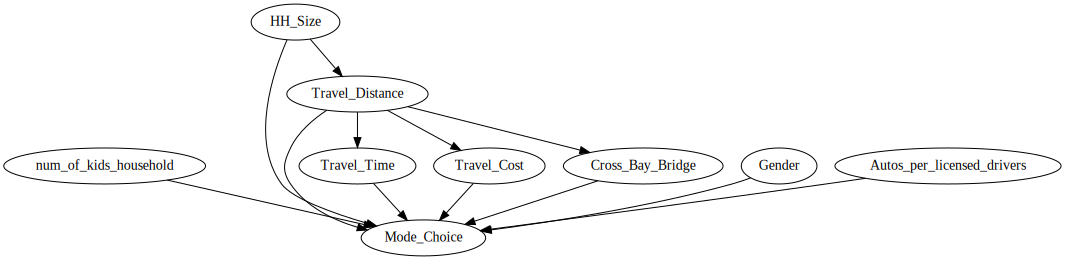

In [17]:
sprinkler = CausalGraphicalModel(
    nodes=["Travel_Time", "Travel_Distance", "Travel_Cost", "Cross_Bay_Bridge", "HH_Size", "num_of_kids_household",
          "Autos_per_licensed_drivers", "Gender", "Mode_Choice"],
    edges=[
        ("Travel_Time", "Mode_Choice"), 
        ("Travel_Distance", "Mode_Choice"), 
        ("Travel_Cost", "Mode_Choice"), 
        ("Cross_Bay_Bridge", "Mode_Choice"), 
        ("HH_Size", "Mode_Choice"), 
        ("num_of_kids_household", "Mode_Choice"), 
        ("Autos_per_licensed_drivers", "Mode_Choice"), 
        ("Gender", "Mode_Choice"), 
        
        
        ("Travel_Distance", "Travel_Time"), 
        ("Travel_Distance", "Travel_Cost"), 
        ("Travel_Distance", "Cross_Bay_Bridge"), 
        ("HH_Size", "Travel_Distance"), 

        
        
#         ("Travel_Time", "Mode_Choice"), 
#         ("Travel_Time", "Mode_Choice"), 

        
        
    ]
)

# draw return a graphviz `dot` object, which jupyter can render
sprinkler.draw()

# MNL specification

In [22]:
# # Create my specification and variable names for the basic MNL model
# # NOTE: - Keys should be variables within the long format dataframe.
# #         The sole exception to this is the "intercept" key.
# #       - For the specification dictionary, the values should be lists
# #         or lists of lists. Within a list, or within the inner-most
# #         list should be the alternative ID's of the alternative whose
# #         utility specification the explanatory variable is entering.

# mnl_specification = OrderedDict()
# mnl_names = OrderedDict()

# mnl_specification["intercept"] = list(range(2, 9))
# mnl_names["intercept"] = ['ASC Shared Ride: 2',
#                           'ASC Shared Ride: 3+',
#                           'ASC Walk-Transit-Walk',
#                           'ASC Drive-Transit-Walk',
#                           'ASC Walk-Transit-Drive',
#                           'ASC Walk',
#                           'ASC Bike']

# mnl_specification["total_travel_time"] = [1, 2, 3, 4, 5, 6]
# mnl_names["total_travel_time"] = ['Travel Time, units:min (Drive Alone)',
#                                   'Travel Time, units:min (SharedRide-2)',
#                                   'Travel Time, units:min (SharedRide-3)',
#                                   'Travel Time, units:min Walk-Transit-Walk',
#                                  'Travel Time, units:min Drive-Transit-Walk',
#                                  'Travel Time, units:min Walk-Transit-Drive']

# mnl_specification["total_travel_cost"] = [[4, 5, 6]]
# mnl_names["total_travel_cost"] = ['Travel Cost, units:$ (All Transit Modes)']

# mnl_specification["cost_per_distance"] = [1, 2, 3]
# mnl_names["cost_per_distance"] = ["Travel Cost per Distance, units:$/mi (Drive Alone)",
#                                   "Travel Cost per Distance, units:$/mi (SharedRide-2)",
#                                   "Travel Cost per Distance, units:$/mi (SharedRide-3+)"]

# mnl_specification["cars_per_licensed_drivers"] = [[1, 2, 3]]
# mnl_names["cars_per_licensed_drivers"] = ["Autos per licensed drivers (All Auto Modes)"]

# mnl_specification["total_travel_distance"] = [7, 8]
# mnl_names["total_travel_distance"] = ['Travel Distance, units:mi (Walk)',
#                                       'Travel Distance, units:mi (Bike)']

# # mnl_specification["cross_bay"] = [[2, 3], [4, 5, 6]]
# # mnl_names["cross_bay"] = ["Cross-Bay Tour (Shared Ride 2 & 3+)",
# #                           "Cross-Bay Tour (All Transit Modes)"]
# mnl_specification["cross_bay"] = [[2, 3]]
# mnl_names["cross_bay"] = ["Cross-Bay Tour (Shared Ride 2 & 3+)"]

# mnl_specification["household_size"] = [[2, 3]]
# mnl_names["household_size"] = ['Household Size (Shared Ride 2 & 3+)']

# mnl_specification["num_kids"] = [[2, 3]]
# mnl_names["num_kids"] = ["Number of Kids in Household (Shared Ride 2 & 3+)"]

In [32]:
# Create my specification and variable names for the basic MNL model
# NOTE: - Keys should be variables within the long format dataframe.
#         The sole exception to this is the "intercept" key.
#       - For the specification dictionary, the values should be lists
#         or lists of lists. Within a list, or within the inner-most
#         list should be the alternative ID's of the alternative whose
#         utility specification the explanatory variable is entering.

mnl_specification = OrderedDict()
mnl_names = OrderedDict()

mnl_specification["intercept"] = [2, 3, 4, 5, 6, 7, 8]
mnl_names["intercept"] = ['ASC Shared Ride: 2',
                          'ASC Shared Ride: 3+',
                          'ASC Walk-Transit-Walk',
                          'ASC Drive-Transit-Walk',
                          'ASC Walk-Transit-Drive',
                          'ASC Walk',
                          'ASC Bike']

mnl_specification["total_travel_time"] = [1, 2, 3, [4, 5, 6]]
mnl_names["total_travel_time"] = ['Travel Time, units:min (Drive Alone)',
                                  'Travel Time, units:min (SharedRide-2)',
                                  'Travel Time, units:min (SharedRide-3+)',
                                  'Travel Time, units:min (All Transit Modes)']

mnl_specification["total_travel_cost"] = [1, 2, 3, [4, 5, 6]]
mnl_names["total_travel_cost"] = ['Travel Cost, units:$ (Drive Alone)',
                                  'Travel Cost, units:$ (SharedRide-2)',
                                  'Travel Cost, units:$ (SharedRide-3+)',
                                  'Travel Cost, units:$ (All Transit Modes)']

# mnl_specification["cost_per_distance"] = [1, 2, 3]
# mnl_names["cost_per_distance"] = ["Travel Cost per Distance, units:$/mi (Drive Alone)",
#                                   "Travel Cost per Distance, units:$/mi (SharedRide-2)",
#                                   "Travel Cost per Distance, units:$/mi (SharedRide-3+)"]

mnl_specification["cars_per_licensed_drivers"] = [[1, 2, 3]]
mnl_names["cars_per_licensed_drivers"] = ["Autos per licensed drivers (All Auto Modes)"]

mnl_specification["total_travel_distance"] = [1, 2, 3, 7, 8]
mnl_names["total_travel_distance"] = ['Travel Distance, units:mi (Drive Alone)',
                                      'Travel Distance, units:mi (SharedRide-2)',
                                      'Travel Distance, units:mi (SharedRide-3+)',
                                      'Travel Distance, units:mi (Walk)',
                                      'Travel Distance, units:mi (Bike)']

# mnl_specification["cross_bay"] = [[2, 3], [4, 5, 6]]
# mnl_names["cross_bay"] = ["Cross-Bay Tour (Shared Ride 2 & 3+)",
#                           "Cross-Bay Tour (All Transit Modes)"]
mnl_specification["cross_bay"] = [[2, 3]]
mnl_names["cross_bay"] = ["Cross-Bay Tour (Shared Ride 2 & 3+)"]

mnl_specification["household_size"] = [[2, 3]]
mnl_names["household_size"] = ['Household Size (Shared Ride 2 & 3+)']

mnl_specification["num_kids"] = [[2, 3]]
mnl_names["num_kids"] = ["Number of Kids in Household (Shared Ride 2 & 3+)"]

# Deconfounder

In [16]:
import tensorflow as tf
import numpy as np
import numpy.random as npr
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import statsmodels.api as sm

from tensorflow_probability import edward2 as ed
from sklearn.datasets import load_breast_cancer
from pandas.plotting import scatter_matrix
from scipy import sparse, stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

import matplotlib
matplotlib.rcParams.update({'font.sans-serif' : 'Helvetica',
                            'axes.labelsize': 10,
                            'xtick.labelsize' : 6,
                            'ytick.labelsize' : 6,
                            'axes.titlesize' : 10})
import matplotlib.pyplot as plt

import seaborn as sns
color_names = ["windows blue",
               "amber",
               "crimson",
               "faded green",
               "dusty purple",
               "greyish"]
colors = sns.xkcd_palette(color_names)
sns.set(style="white", palette=sns.xkcd_palette(color_names), color_codes = False)

In [17]:
X_columns = ['total_travel_time',
       'total_travel_cost', 
#              'total_travel_distance', 
             'cross_bay', 'household_size', 'num_kids', 
              'cars_per_licensed_drivers', 
             'gender'
             
            ]

y_column = data['mode_id']

In [31]:
spec_dic = specifications(mnl_specification=mnl_specification, num_modes=8)
spec_dic

{1: ['total_travel_time',
  'total_travel_cost',
  'cars_per_licensed_drivers',
  'total_travel_distance'],
 2: ['intercept',
  'total_travel_time',
  'total_travel_cost',
  'cars_per_licensed_drivers',
  'total_travel_distance',
  'cross_bay',
  'household_size',
  'num_kids'],
 3: ['intercept',
  'total_travel_time',
  'total_travel_cost',
  'cars_per_licensed_drivers',
  'total_travel_distance',
  'cross_bay',
  'household_size',
  'num_kids'],
 4: ['intercept', 'total_travel_time', 'total_travel_cost'],
 5: ['intercept', 'total_travel_time', 'total_travel_cost'],
 6: ['intercept', 'total_travel_time', 'total_travel_cost'],
 7: ['intercept', 'total_travel_distance'],
 8: ['intercept', 'total_travel_distance']}

Analysis for mode:  1
-------------------------------------------------------------------------------------------


/Users/hassanobeid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: tfp.edward2 module is deprecated and will be removed on 2019-12-01. Use https://github.com/google/edward2 library instead.


Inferred axes:
[[ 1.0415646   1.0410162  -0.01311183  1.0512028 ]]
Standard Deviation:
[[0.00672601 0.00602228 0.00684015 0.0053572 ]]


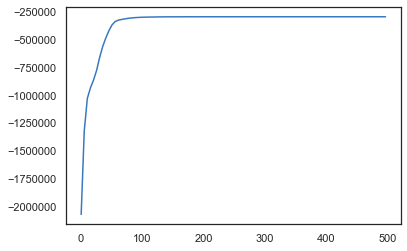

Analysis for mode:  2
-------------------------------------------------------------------------------------------
2 ['total_travel_time', 'total_travel_cost', 'cars_per_licensed_drivers', 'total_travel_distance', 'cross_bay', 'household_size', 'num_kids']
Inferred axes:
[[1.0489920e+00 1.0470781e+00 2.0332595e-02 1.0587584e+00 9.1360308e-02
  5.4233424e-02 3.2550993e-04]]
Standard Deviation:
[[0.00731374 0.0060666  0.00664856 0.00700707 0.00659326 0.00759795
  0.00606707]]


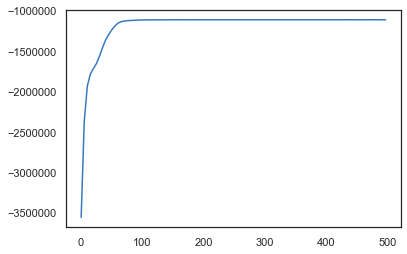

Analysis for mode:  3
-------------------------------------------------------------------------------------------
3 ['total_travel_time', 'total_travel_cost', 'cars_per_licensed_drivers', 'total_travel_distance', 'cross_bay', 'household_size', 'num_kids']
Inferred axes:
[[ 1.0576638   1.0589802   0.07113783  1.0611237  -0.02500792 -0.01016634
  -0.00259158]]
Standard Deviation:
[[0.00766633 0.00610653 0.00705928 0.00619811 0.00537949 0.00738107
  0.00619622]]


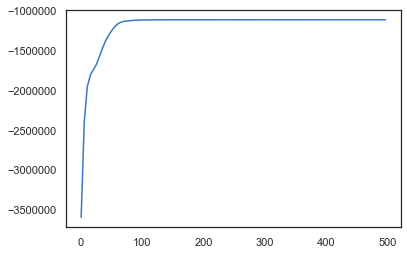

Analysis for mode:  4
-------------------------------------------------------------------------------------------
4 ['total_travel_time', 'total_travel_cost']
Inferred axes:
[[3.0114665 2.9018524]]
Standard Deviation:
[[0.00760387 0.01246895]]


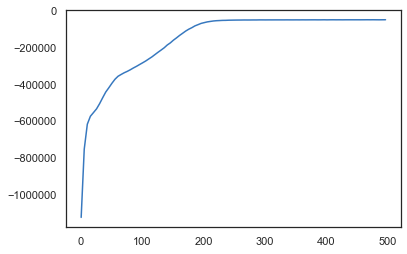

Analysis for mode:  5
-------------------------------------------------------------------------------------------
5 ['total_travel_time', 'total_travel_cost']
Inferred axes:
[[0.892433   0.88219506]]
Standard Deviation:
[[0.00606328 0.00551216]]


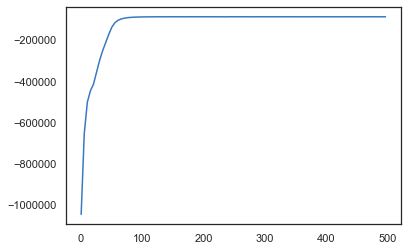

Analysis for mode:  6
-------------------------------------------------------------------------------------------
6 ['total_travel_time', 'total_travel_cost']
Inferred axes:
[[0.8782947 0.8793421]]
Standard Deviation:
[[0.00499418 0.00546462]]


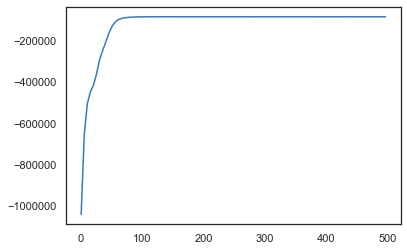

Analysis for mode:  7
-------------------------------------------------------------------------------------------
7 ['total_travel_distance']
Inferred axes:
[[3.8975062]]
Standard Deviation:
[[0.02067421]]


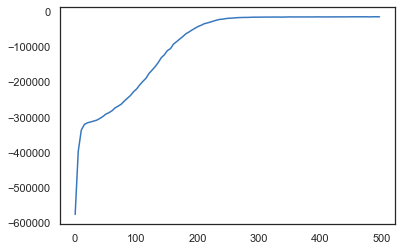

Analysis for mode:  8
-------------------------------------------------------------------------------------------
8 ['total_travel_distance']
Inferred axes:
[[4.4265914]]
Standard Deviation:
[[0.00902549]]


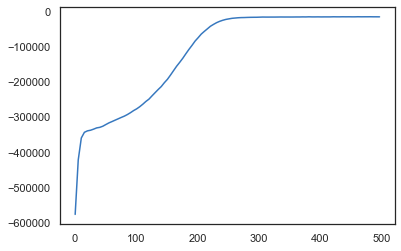

In [19]:
confounder_vectors = []
holdout_dfs = []
masks_df = []
rows_df =[]
latent_dim = 1
for i in data['mode_id'].unique():

    data_mode_i = data[data['mode_id']==i]
    # standardize the data for PPCA
    print("Analysis for mode: ", i)
    print("-------------------------------------------------------------------------------------------")
    X_columns = spec_dic[i]
    
    if 'intercept' in X_columns:
        X_columns.remove('intercept')
        print(i, X_columns)
    
    X = np.array((data_mode_i[X_columns] - data_mode_i[X_columns].mean())/data_mode_i[X_columns].std())
    
    confounders, holdouts, holdoutmasks, holdoutrow= confounder(holdout_portion=0.2, X=X, latent_dim=latent_dim)

    confounder_vectors.append(confounders)
    holdout_dfs.append(holdouts)
    masks_df.append(holdoutmasks)
    rows_df.append(holdoutrow)

# Predictive checks for confounder -- draft version

In [23]:
### Get heldout and confounder data for modes where deconfounder is to be included 
holdouts_req = holdout_dfs[:3]
holdouts_req[0].shape

confounder_req = confounder_vectors[:3]


In [25]:
n_rep = 100 # number of replicated datasets we generate
holdout_gen_util = []

for j in range(len(holdouts_req)):
    holdout_gen = np.zeros((n_rep,*(holdouts_req[j].shape)))
    for i in range(n_rep):
        w_sample = npr.normal(confounder_req[j][0], confounder_req[j][1])
        z_sample = npr.normal(confounder_req[j][2], confounder_req[j][3])
        
        data_dim_temp = holdouts_req[j].shape[1]
        latent_dim_temp = confounder_req[j][2].shape[1]
        num_datapoints_temp = holdouts_req[j].shape[0]
        
        with ed.interception(replace_latents(w_sample, z_sample)):
            generate = ppca_model(
                data_dim=data_dim_temp, latent_dim=latent_dim_temp,
                num_datapoints=num_datapoints_temp, stddv_datapoints=0.1, holdout_mask=masks_df[j])

        with tf.Session() as sess:
            x_generated, _ = sess.run(generate)

        # look only at the heldout entries
        holdout_gen[i] = np.multiply(x_generated, masks_df[j])
        
    holdout_gen_util.append(holdout_gen)

In [ ]:
n_eval = 100 # we draw samples from the inferred Z and W
obs_ll_per_zi_per_mode = []
rep_ll_per_zi_per_mode = []
stddv_datapoints=0.1
for mode in range(len(holdouts_req)):
    obs_ll = []
    rep_ll = []

    for j in range(n_eval):
        w_sample = npr.normal(confounder_req[mode][0], confounder_req[mode][1])
        z_sample = npr.normal(confounder_req[mode][2], confounder_req[mode][3])

        holdoutmean_sample = np.multiply(z_sample.dot(w_sample), masks_df[mode])
        obs_ll.append(np.mean(stats.norm(holdoutmean_sample, \
                            stddv_datapoints).logpdf(holdouts_req[mode]), axis=1))

        rep_ll.append(np.mean(stats.norm(holdoutmean_sample, \
                            stddv_datapoints).logpdf(holdout_gen_util[mode]),axis=2))

    obs_ll_per_zi, rep_ll_per_zi = np.mean(np.array(obs_ll), axis=0), np.mean(np.array(rep_ll), axis=0)
    obs_ll_per_zi_per_mode.append(obs_ll_per_zi)
    rep_ll_per_zi_per_mode.append(rep_ll_per_zi)

In [ ]:
pval_mode = []
for mode in range(len(holdouts_req)):
    pvals = np.array([np.mean(rep_ll_per_zi_per_mode[mode][:,i] < obs_ll_per_zi_per_mode[mode][i]) 
                      for i in range(holdouts_req[mode].shape[0])])
    holdout_subjects = np.unique(rows_df[mode])
    overall_pval = np.mean(pvals[holdout_subjects])
    pval_mode.append(overall_pval)
#     print("Predictive check p-values", overall_pval)

pval_mode

In [ ]:
len(rows_df[6])

In [ ]:
holdout_subjects_0 = np.unique(rows_df[0])

subject_no = npr.choice(holdout_subjects_0) 
sns.kdeplot(rep_ll_per_zi_per_mode[0][:,subject_no]).set_title("Predictive check for subject "+str(subject_no))
plt.axvline(x=obs_ll_per_zi_per_mode[0][subject_no], linestyle='--')

### Adding confounders to original DF

In [20]:
for i in data['mode_id'].unique():
    
#     print(len(data.loc[data['mode_id']==i, col_name]), len(confounder_vectors[int(i-1)][2]) )
    
    col_name = 'confounder_for_mode_' + str(int(i))
    data.loc[data['mode_id']==i, col_name] = confounder_vectors[int(i-1)][2]
    data[col_name] = data[col_name].fillna(0)
    
data['confounder_all'] = data[['confounder_for_mode_1','confounder_for_mode_2','confounder_for_mode_3',
                              'confounder_for_mode_4', 'confounder_for_mode_5', 'confounder_for_mode_6',
                              'confounder_for_mode_7', 'confounder_for_mode_8']].sum(axis=1)

In [46]:
data['confounder_all_2'] = confounders_using_all[2]

## Estimate original MNL

In [29]:
# data


In [33]:
# Estimate the basic MNL model, using the hessian and newton-conjugate gradient
mnl_model = cm.create_choice_model(data=data,
                                   alt_id_col="mode_id",
                                   obs_id_col="observation_id",
                                   choice_col="sim_choice",
                                   specification=mnl_specification,
                                   model_type="MNL",
                                   names=mnl_names)

num_vars = len(reduce(lambda x, y: x + y, mnl_names.values()))
# Note newton-cg used to ensure convergence to a point where gradient 
# is essentially zero for all dimensions. 
mnl_model.fit_mle(np.zeros(num_vars),
                  method="BFGS")

# Look at the estimation results
mnl_model.get_statsmodels_summary()

/Users/hassanobeid/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))


Log-likelihood at zero: -15,176.6986
Initial Log-likelihood: -15,176.6986


/Users/hassanobeid/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.32 seconds.
Final log-likelihood: -8,116.6614


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                  sim_choice   No. Observations:                8,000
Model:             Multinomial Logit Model   Df Residuals:                    7,976
Method:                                MLE   Df Model:                           24
Date:                     Sun, 03 May 2020   Pseudo R-squ.:                   0.465
Time:                             11:24:41   Pseudo R-bar-squ.:               0.464
AIC:                            16,281.323   Log-Likelihood:             -8,116.661
BIC:                            16,449.016   LL-Null:                   -15,176.699
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
ASC Shared Ride: 2                                  -1.4806      0.125    -11.831      0.000      -1.726      -1.235
ASC Shared Ride: 3+                                 -1.0591      0.135     -7.847      0.000      -1.324      -0.795
ASC Walk-Transit-Walk                                0.9292      0.131      7.078      0.000       0.672       1.186
ASC Drive-Transit-Walk                              -1.4083      0.145     -9.716      0.000      -1.692      -1.124
ASC Walk-Transit-Drive                              -1.6138      0.150    -10.788      0.000      -1.907      -1.321
ASC Walk                                             3.0480      0.135     22.606      0.000       2.784       3.312
ASC Bike                                             0.2714      0.103      2.627      0.009       0.069       0.474
Travel Time, units:min (Drive Alone)                -0.0844      0.005    -16.886      0.000      -0.094      -0.075
Travel Time, units:min (SharedRide-2)               -0.0903      0.006    -14.750      0.000      -0.102      -0.078
Travel Time, units:min (SharedRide-3+)              -0.1261      0.008    -16.050      0.000      -0.141      -0.111
Travel Time, units:min (All Transit Modes)          -0.0297      0.002    -19.750      0.000      -0.033      -0.027
Travel Cost, units:$ (Drive Alone)                  -0.2292      0.026     -8.744      0.000      -0.281      -0.178
Travel Cost, units:$ (SharedRide-2)                 -0.4378      0.057     -7.636      0.000      -0.550      -0.325
Travel Cost, units:$ (SharedRide-3+)                -0.7461      0.157     -4.749      0.000      -1.054      -0.438
Travel Cost, units:$ (All Transit Modes)            -0.1180      0.019     -6.316      0.000      -0.155      -0.081
Autos per licensed drivers (All Auto Modes)          1.3336      0.055     24.051      0.000       1.225       1.442
Travel Distance, units:mi (Drive Alone)              0.1056      0.009     11.880      0.000       0.088       0.123
Travel Distance, units:mi (SharedRide-2)             0.0637      0.011      5.689      0.000       0.042       0.086
Travel Distance, units:mi (SharedRide-3+)            0.0359      0.017      2.057      0.040       0.002       0.070
Travel Distance, units:mi (Walk)                    -1.0998      0.037    -30.075      0.000      -1.171      -1.028
Travel Distance, units:mi (Bike)                    -0.3209      0.016    -20.290      0.000      -0.352      -0.290
Cross-Bay Tour (Shared Ride 2 & 3+)                  0.6706      0.123      5.459      0.000       0.430       0.911
Household Size (Shared Ride 2 & 3+)                  0.1142      0.022      5.194      0.000       0.071       0.157
Number of Kids in Household (Shared Ride 2 & 3+)     0.5737      0.026     21.827      0.000       0.522       0.625
=====================================

## Estimate non-causal MNL -- omit travel distance

In [34]:
# Create my specification and variable names for the basic MNL model
# NOTE: - Keys should be variables within the long format dataframe.
#         The sole exception to this is the "intercept" key.
#       - For the specification dictionary, the values should be lists
#         or lists of lists. Within a list, or within the inner-most
#         list should be the alternative ID's of the alternative whose
#         utility specification the explanatory variable is entering.

mnl_specification_noncausal = OrderedDict()
mnl_names_noncausal = OrderedDict()

mnl_specification_noncausal["intercept"] = [2, 3, 4, 5, 6, 7, 8]
mnl_names_noncausal["intercept"] = ['ASC Shared Ride: 2',
                          'ASC Shared Ride: 3+',
                          'ASC Walk-Transit-Walk',
                          'ASC Drive-Transit-Walk',
                          'ASC Walk-Transit-Drive',
                          'ASC Walk',
                          'ASC Bike']

mnl_specification_noncausal["total_travel_time"] = [1, 2, 3, [4, 5, 6]]
mnl_names_noncausal["total_travel_time"] = ['Travel Time, units:min (Drive Alone)',
                                  'Travel Time, units:min (SharedRide-2)',
                                  'Travel Time, units:min (SharedRide-3+)',
                                  'Travel Time, units:min (All Transit Modes)']

mnl_specification_noncausal["total_travel_cost"] = [1, 2, 3, [4, 5, 6]]
mnl_names_noncausal["total_travel_cost"] = ['Travel Cost, units:$ (Drive Alone)',
                                  'Travel Cost, units:$ (SharedRide-2)',
                                  'Travel Cost, units:$ (SharedRide-3+)',
                                  'Travel Cost, units:$ (All Transit Modes)']

# mnl_specification["cost_per_distance"] = [1, 2, 3]
# mnl_names["cost_per_distance"] = ["Travel Cost per Distance, units:$/mi (Drive Alone)",
#                                   "Travel Cost per Distance, units:$/mi (SharedRide-2)",
#                                   "Travel Cost per Distance, units:$/mi (SharedRide-3+)"]

mnl_specification_noncausal["cars_per_licensed_drivers"] = [[1, 2, 3]]
mnl_names_noncausal["cars_per_licensed_drivers"] = ["Autos per licensed drivers (All Auto Modes)"]

# mnl_specification["total_travel_distance"] = [1, 2, 3, 7, 8]
# mnl_names["total_travel_distance"] = ['Travel Distance, units:mi (Drive Alone)',
#                                       'Travel Distance, units:mi (SharedRide-2)',
#                                       'Travel Distance, units:mi (SharedRide-3+)',
#                                       'Travel Distance, units:mi (Walk)',
#                                       'Travel Distance, units:mi (Bike)']

# mnl_specification["cross_bay"] = [[2, 3], [4, 5, 6]]
# mnl_names["cross_bay"] = ["Cross-Bay Tour (Shared Ride 2 & 3+)",
#                           "Cross-Bay Tour (All Transit Modes)"]
mnl_specification_noncausal["cross_bay"] = [[2, 3]]
mnl_names_noncausal["cross_bay"] = ["Cross-Bay Tour (Shared Ride 2 & 3+)"]

mnl_specification_noncausal["household_size"] = [[2, 3]]
mnl_names_noncausal["household_size"] = ['Household Size (Shared Ride 2 & 3+)']

mnl_specification_noncausal["num_kids"] = [[2, 3]]
mnl_names_noncausal["num_kids"] = ["Number of Kids in Household (Shared Ride 2 & 3+)"]

In [36]:
# Estimate the basic MNL model, using the hessian and newton-conjugate gradient
mnl_model_noncausal = cm.create_choice_model(data=data,
                                   alt_id_col="mode_id",
                                   obs_id_col="observation_id",
                                   choice_col="sim_choice",
                                   specification=mnl_specification_noncausal,
                                   model_type="MNL",
                                   names=mnl_names_noncausal)

num_vars_noncausal = len(reduce(lambda x, y: x + y, mnl_names_noncausal.values()))
# Note newton-cg used to ensure convergence to a point where gradient 
# is essentially zero for all dimensions. 
mnl_model_noncausal.fit_mle(np.zeros(num_vars_noncausal),
                  method="BFGS")

# Look at the estimation results
mnl_model_noncausal.get_statsmodels_summary()

Log-likelihood at zero: -15,176.6986
Initial Log-likelihood: -15,176.6986


/Users/hassanobeid/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.24 seconds.
Final log-likelihood: -10,288.5691


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                  sim_choice   No. Observations:                8,000
Model:             Multinomial Logit Model   Df Residuals:                    7,981
Method:                                MLE   Df Model:                           19
Date:                     Sun, 03 May 2020   Pseudo R-squ.:                   0.322
Time:                             11:29:22   Pseudo R-bar-squ.:               0.321
AIC:                            20,615.138   Log-Likelihood:            -10,288.569
BIC:                            20,747.895   LL-Null:                   -15,176.699
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
ASC Shared Ride: 2                                  -1.1772      0.116    -10.187      0.000      -1.404      -0.951
ASC Shared Ride: 3+                                 -0.7079      0.126     -5.628      0.000      -0.954      -0.461
ASC Walk-Transit-Walk                                0.9579      0.122      7.877      0.000       0.720       1.196
ASC Drive-Transit-Walk                              -1.2297      0.138     -8.930      0.000      -1.500      -0.960
ASC Walk-Transit-Drive                              -1.4191      0.143     -9.955      0.000      -1.699      -1.140
ASC Walk                                            -1.0122      0.074    -13.670      0.000      -1.157      -0.867
ASC Bike                                            -1.2166      0.075    -16.141      0.000      -1.364      -1.069
Travel Time, units:min (Drive Alone)                -0.0386      0.003    -11.916      0.000      -0.045      -0.032
Travel Time, units:min (SharedRide-2)               -0.0623      0.004    -14.178      0.000      -0.071      -0.054
Travel Time, units:min (SharedRide-3+)              -0.1087      0.006    -16.983      0.000      -0.121      -0.096
Travel Time, units:min (All Transit Modes)          -0.0271      0.001    -19.033      0.000      -0.030      -0.024
Travel Cost, units:$ (Drive Alone)                  -0.0210      0.018     -1.138      0.255      -0.057       0.015
Travel Cost, units:$ (SharedRide-2)                 -0.2069      0.041     -4.996      0.000      -0.288      -0.126
Travel Cost, units:$ (SharedRide-3+)                -0.4500      0.100     -4.505      0.000      -0.646      -0.254
Travel Cost, units:$ (All Transit Modes)            -0.1086      0.018     -6.073      0.000      -0.144      -0.074
Autos per licensed drivers (All Auto Modes)          1.0899      0.050     22.013      0.000       0.993       1.187
Cross-Bay Tour (Shared Ride 2 & 3+)                  0.6499      0.116      5.620      0.000       0.423       0.876
Household Size (Shared Ride 2 & 3+)                  0.0980      0.021      4.726      0.000       0.057       0.139
Number of Kids in Household (Shared Ride 2 & 3+)     0.5143      0.025     20.723      0.000       0.466       0.563
====================================================================================================================
"""

## Estimate Causal MNL - method 1

In [37]:
mnl_specification_causal = mnl_specification_noncausal.copy()
mnl_names_causal = mnl_names_noncausal.copy()

mnl_specification_causal["confounder_all"] = [1, 2, 3]
mnl_names_causal["confounder_all"] = ["Confounder - Drive alone",
                                     "Confounder - Shared ride 2", 
                                     "Confounder - Shared ride 3"]

In [39]:
# Estimate the basic MNL model, using the hessian and newton-conjugate gradient
mnl_model_causal = cm.create_choice_model(data=data,
                                   alt_id_col="mode_id",
                                   obs_id_col="observation_id",
                                   choice_col="sim_choice",
                                   specification=mnl_specification_causal,
                                   model_type="MNL",
                                   names=mnl_names_causal)

num_vars = len(reduce(lambda x, y: x + y, mnl_names_causal.values()))
# Note newton-cg used to ensure convergence to a point where gradient 
# is essentially zero for all dimensions. 
mnl_model_causal.fit_mle(np.zeros(num_vars),
                  method="BFGS")

# Look at the estimation results
mnl_model_causal.get_statsmodels_summary()

/Users/hassanobeid/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))


Log-likelihood at zero: -15,176.6986
Initial Log-likelihood: -15,176.6986


/Users/hassanobeid/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.28 seconds.
Final log-likelihood: -10,268.2053


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                  sim_choice   No. Observations:                8,000
Model:             Multinomial Logit Model   Df Residuals:                    7,978
Method:                                MLE   Df Model:                           22
Date:                     Sun, 03 May 2020   Pseudo R-squ.:                   0.323
Time:                             11:35:13   Pseudo R-bar-squ.:               0.322
AIC:                            20,580.411   Log-Likelihood:            -10,268.205
BIC:                            20,734.129   LL-Null:                   -15,176.699
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
ASC Shared Ride: 2                                  -2.8017      0.313     -8.938      0.000      -3.416      -2.187
ASC Shared Ride: 3+                                 -2.5884      0.392     -6.605      0.000      -3.356      -1.820
ASC Walk-Transit-Walk                               -0.7083      0.302     -2.343      0.019      -1.301      -0.116
ASC Drive-Transit-Walk                              -2.8968      0.309     -9.363      0.000      -3.503      -2.290
ASC Walk-Transit-Drive                              -3.0842      0.311     -9.909      0.000      -3.694      -2.474
ASC Walk                                            -2.6780      0.287     -9.343      0.000      -3.240      -2.116
ASC Bike                                            -2.8825      0.287    -10.043      0.000      -3.445      -2.320
Travel Time, units:min (Drive Alone)                -0.0734      0.007    -11.037      0.000      -0.086      -0.060
Travel Time, units:min (SharedRide-2)               -0.0634      0.005    -13.343      0.000      -0.073      -0.054
Travel Time, units:min (SharedRide-3+)              -0.1047      0.008    -13.152      0.000      -0.120      -0.089
Travel Time, units:min (All Transit Modes)          -0.0271      0.001    -19.019      0.000      -0.030      -0.024
Travel Cost, units:$ (Drive Alone)                  -0.2165      0.037     -5.787      0.000      -0.290      -0.143
Travel Cost, units:$ (SharedRide-2)                 -0.2154      0.045     -4.814      0.000      -0.303      -0.128
Travel Cost, units:$ (SharedRide-3+)                -0.3783      0.132     -2.858      0.004      -0.638      -0.119
Travel Cost, units:$ (All Transit Modes)            -0.1089      0.018     -6.083      0.000      -0.144      -0.074
Autos per licensed drivers (All Auto Modes)          1.0985      0.050     22.120      0.000       1.001       1.196
Cross-Bay Tour (Shared Ride 2 & 3+)                  0.6375      0.116      5.484      0.000       0.410       0.865
Household Size (Shared Ride 2 & 3+)                  0.0971      0.021      4.668      0.000       0.056       0.138
Number of Kids in Household (Shared Ride 2 & 3+)     0.5148      0.025     20.716      0.000       0.466       0.563
Confounder - Drive alone                             1.6484      0.273      6.035      0.000       1.113       2.184
Confounder - Shared ride 2                           0.0433      0.083      0.523      0.601      -0.119       0.206
Confounder - Shared ride 3                          -0.2140      0.248     -0.864      0.388      -0.699       0.271
====================================================================================================================
"""

## Estimate Causal MNL - method 2

In [50]:
xs = ['total_travel_time', 'total_travel_cost']
X_DA = (data[data['mode_id']==1][xs] - data[data['mode_id']==1][xs].mean())/data[data['mode_id']==1][xs].std()

X_SR2 = (data[data['mode_id']==2][xs] - data[data['mode_id']==2][xs].mean())/data[data['mode_id']==2][xs].std()

X_SR3 = (data[data['mode_id']==3][xs] - data[data['mode_id']==3][xs].mean())/data[data['mode_id']==3][xs].std()

Inferred axes:
[[0.99745077 0.9977783 ]]
Standard Deviation:
[[0.00490426 0.00748236]]


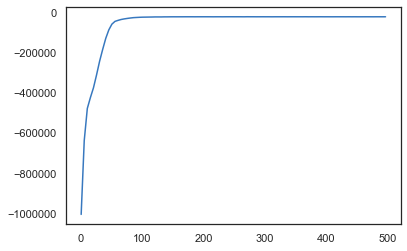

Inferred axes:
[[1.0127773 1.010102 ]]
Standard Deviation:
[[0.00788469 0.00632451]]


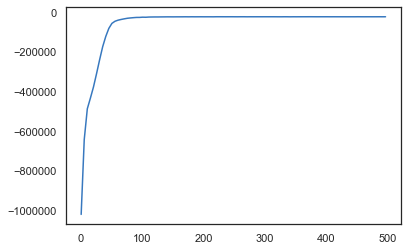

Inferred axes:
[[1.0128971 1.0268826]]
Standard Deviation:
[[0.00808526 0.00621221]]


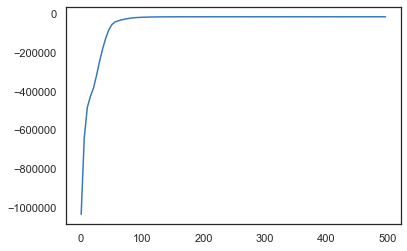

In [51]:
(confounders_DA, holdouts_DA, 
 holdoutmasks_DA, holdoutrow_DA)= confounder(holdout_portion=0.2, 
                                       X=X_DA, latent_dim=latent_dim)

(confounders_SR2, holdouts_SR2, 
 holdoutmasks_SR2, holdoutrow_SR2)= confounder(holdout_portion=0.2, 
                                       X=X_SR2, latent_dim=latent_dim)

(confounders_SR3, holdouts_SR3, 
 holdoutmasks_SR3, holdoutrow_SR3)= confounder(holdout_portion=0.2, 
                                       X=X_SR3, latent_dim=latent_dim)

In [55]:
data.loc[data['mode_id']==1, 'confounder_da'] = confounders_DA[2]
data['confounder_da'] = data['confounder_da'].fillna(0)

data.loc[data['mode_id']==2, 'confounder_sr2'] = confounders_SR2[2]
data['confounder_sr2'] = data['confounder_sr2'].fillna(0)

data.loc[data['mode_id']==3, 'confounder_sr3'] = confounders_SR3[2]
data['confounder_sr3'] = data['confounder_sr3'].fillna(0)

data['confounder_all_2'] = data[['confounder_da', 'confounder_sr2', 'confounder_sr3']].sum(axis=1)
data.head()





,observation_id,mode_id,sim_choice,num_kids,household_size,num_cars,num_licensed_drivers,cross_bay,total_travel_time,total_travel_cost,...,confounder_for_mode_4,confounder_for_mode_5,confounder_for_mode_6,confounder_for_mode_7,confounder_for_mode_8,confounder_all,confounder_all_2,confounder_da,confounder_sr2,confounder_sr3
0,1,1,0,1,3.0,2.0,3.0,1,35.544668,6.564386,...,0.000000,0.000000,0.0,0.0,0.0,0.444009,0.869016,0.869016,0.0000,0.000000
1,1,2,0,1,3.0,2.0,3.0,1,22.614221,1.676586,...,0.000000,0.000000,0.0,0.0,0.0,-0.063754,-0.206300,0.000000,-0.2063,0.000000
2,1,3,0,1,3.0,2.0,3.0,1,3.906758,0.085364,...,0.000000,0.000000,0.0,0.0,0.0,-0.896882,-0.952396,0.000000,0.0000,-0.952396
3,1,4,0,1,3.0,2.0,3.0,1,102.434669,3.359414,...,-0.063593,0.000000,0.0,0.0,0.0,-0.063593,0.000000,0.000000,0.0000,0.000000
4,1,5,0,1,3.0,2.0,3.0,1,79.962397,1.870520,...,0.000000,-0.741831,0.0,0.0,0.0,-0.741831,0.000000,0.000000,0.0000,0.000000


In [56]:
mnl_specification_causal = mnl_specification_noncausal.copy()
mnl_names_causal = mnl_names_noncausal.copy()

mnl_specification_causal["confounder_all_2"] = [1, 2, 3]
mnl_names_causal["confounder_all_2"] = ["Confounder - Drive alone",
                                     "Confounder - Shared ride 2", 
                                     "Confounder - Shared ride 3"]

In [70]:
# Estimate the basic MNL model, using the hessian and newton-conjugate gradient
mnl_model_causal = cm.create_choice_model(data=data,
                                   alt_id_col="mode_id",
                                   obs_id_col="observation_id",
                                   choice_col="sim_choice",
                                   specification=mnl_specification_causal,
                                   model_type="MNL",
                                   names=mnl_names_causal)

num_vars = len(reduce(lambda x, y: x + y, mnl_names_causal.values()))
# Note newton-cg used to ensure convergence to a point where gradient 
# is essentially zero for all dimensions. 
mnl_model_causal.fit_mle(np.zeros(num_vars),
                  method="BFGS")

# Look at the estimation results
mnl_model_causal.get_statsmodels_summary()

/Users/hassanobeid/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))


Log-likelihood at zero: -15,176.6986
Initial Log-likelihood: -15,176.6986


/Users/hassanobeid/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.27 seconds.
Final log-likelihood: -10,288.4876


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                  sim_choice   No. Observations:                8,000
Model:             Multinomial Logit Model   Df Residuals:                    7,978
Method:                                MLE   Df Model:                           22
Date:                     Sun, 03 May 2020   Pseudo R-squ.:                   0.322
Time:                             12:19:11   Pseudo R-bar-squ.:               0.321
AIC:                            20,620.975   Log-Likelihood:            -10,288.488
BIC:                            20,774.693   LL-Null:                   -15,176.699
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
ASC Shared Ride: 2                                  -1.0969      0.311     -3.526      0.000      -1.707      -0.487
ASC Shared Ride: 3+                                 -0.6844      0.380     -1.801      0.072      -1.429       0.061
ASC Walk-Transit-Walk                                1.0248      0.216      4.739      0.000       0.601       1.449
ASC Drive-Transit-Walk                              -1.1626      0.226     -5.149      0.000      -1.605      -0.720
ASC Walk-Transit-Drive                              -1.3521      0.229     -5.912      0.000      -1.800      -0.904
ASC Walk                                            -0.9450      0.194     -4.869      0.000      -1.325      -0.565
ASC Bike                                            -1.1494      0.195     -5.908      0.000      -1.531      -0.768
Travel Time, units:min (Drive Alone)                -0.0373      0.005     -7.625      0.000      -0.047      -0.028
Travel Time, units:min (SharedRide-2)               -0.0626      0.007     -9.621      0.000      -0.075      -0.050
Travel Time, units:min (SharedRide-3+)              -0.1078      0.009    -11.761      0.000      -0.126      -0.090
Travel Time, units:min (All Transit Modes)          -0.0271      0.001    -19.032      0.000      -0.030      -0.024
Travel Cost, units:$ (Drive Alone)                  -0.0129      0.028     -0.455      0.649      -0.069       0.043
Travel Cost, units:$ (SharedRide-2)                 -0.2096      0.063     -3.305      0.001      -0.334      -0.085
Travel Cost, units:$ (SharedRide-3+)                -0.4355      0.141     -3.080      0.002      -0.713      -0.158
Travel Cost, units:$ (All Transit Modes)            -0.1086      0.018     -6.072      0.000      -0.144      -0.074
Autos per licensed drivers (All Auto Modes)          1.0901      0.050     22.015      0.000       0.993       1.187
Cross-Bay Tour (Shared Ride 2 & 3+)                  0.6500      0.116      5.619      0.000       0.423       0.877
Household Size (Shared Ride 2 & 3+)                  0.0980      0.021      4.727      0.000       0.057       0.139
Number of Kids in Household (Shared Ride 2 & 3+)     0.5142      0.025     20.721      0.000       0.466       0.563
Confounder - Drive alone                            -0.0647      0.173     -0.374      0.708      -0.403       0.274
Confounder - Shared ride 2                           0.0125      0.215      0.058      0.953      -0.408       0.433
Confounder - Shared ride 3                          -0.0413      0.294     -0.141      0.888      -0.617       0.534
====================================================================================================================
"""

## Investigate

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


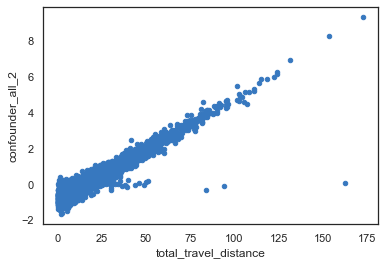

In [72]:
data_da = data[data['mode_id']==1]

data_da.plot.scatter('total_travel_distance', 'confounder_all_2')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


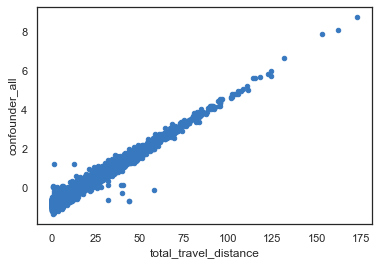

In [77]:
data_mode_specific = data[data['mode_id']==1]

data_mode_specific.plot.scatter('total_travel_distance', 'confounder_all')

## Putting everything in a function

In [11]:
def confounder(X, latent_dim, holdout_portion):
    # randomly holdout some entries of X
    num_datapoints, data_dim = X.shape

    holdout_portion = holdout_portion
    n_holdout = int(holdout_portion * num_datapoints * data_dim)

    holdout_row = np.random.randint(num_datapoints, size=n_holdout)
    holdout_col = np.random.randint(data_dim, size=n_holdout)
    holdout_mask = (sparse.coo_matrix((np.ones(n_holdout), \
                                (holdout_row, holdout_col)), \
                                shape = X.shape)).toarray()

    holdout_subjects = np.unique(holdout_row)

    x_train = np.multiply(1-holdout_mask, X)
    x_vad = np.multiply(holdout_mask, X)

    def ppca_model(data_dim, latent_dim, num_datapoints, stddv_datapoints):
        w = ed.Normal(loc=tf.zeros([latent_dim, data_dim]),
                    scale=tf.ones([latent_dim, data_dim]),
                    name="w")  # parameter
        z = ed.Normal(loc=tf.zeros([num_datapoints, latent_dim]),
                    scale=tf.ones([num_datapoints, latent_dim]), 
                    name="z")  # local latent variable / substitute confounder
        x = ed.Normal(loc=tf.multiply(tf.matmul(z, w), 1-holdout_mask),
                    scale=stddv_datapoints * tf.ones([num_datapoints, data_dim]),
                    name="x")  # (modeled) data
        return x, (w, z)

    log_joint = ed.make_log_joint_fn(ppca_model)

    latent_dim = latent_dim
    stddv_datapoints = 0.1

    model = ppca_model(data_dim=data_dim,
                       latent_dim=latent_dim,
                       num_datapoints=num_datapoints,
                       stddv_datapoints=stddv_datapoints)

    def variational_model(qw_mean, qw_stddv, qz_mean, qz_stddv):
        qw = ed.Normal(loc=qw_mean, scale=qw_stddv, name="qw")
        qz = ed.Normal(loc=qz_mean, scale=qz_stddv, name="qz")
        return qw, qz


    log_q = ed.make_log_joint_fn(variational_model)

    def target(w, z):
        """Unnormalized target density as a function of the parameters."""
        return log_joint(data_dim=data_dim,
                       latent_dim=latent_dim,
                       num_datapoints=num_datapoints,
                       stddv_datapoints=stddv_datapoints,
                       w=w, z=z, x=x_train)

    def target_q(qw, qz):
        return log_q(qw_mean=qw_mean, qw_stddv=qw_stddv,
                   qz_mean=qz_mean, qz_stddv=qz_stddv,
                   qw=qw, qz=qz)


    qw_mean = tf.Variable(np.ones([latent_dim, data_dim]), dtype=tf.float32)
    qz_mean = tf.Variable(np.ones([num_datapoints, latent_dim]), dtype=tf.float32)
    qw_stddv = tf.nn.softplus(tf.Variable(-4 * np.ones([latent_dim, data_dim]), dtype=tf.float32))
    qz_stddv = tf.nn.softplus(tf.Variable(-4 * np.ones([num_datapoints, latent_dim]), dtype=tf.float32))

    qw, qz = variational_model(qw_mean=qw_mean, qw_stddv=qw_stddv,
                               qz_mean=qz_mean, qz_stddv=qz_stddv)


    energy = target(qw, qz)
    entropy = -target_q(qw, qz)

    elbo = energy + entropy


    optimizer = tf.train.AdamOptimizer(learning_rate = 0.05)
    train = optimizer.minimize(-elbo)

    init = tf.global_variables_initializer()

    t = []

    num_epochs = 500

    with tf.Session() as sess:
        sess.run(init)

        for i in range(num_epochs):
            sess.run(train)
            if i % 5 == 0:
                t.append(sess.run([elbo]))

            w_mean_inferred = sess.run(qw_mean)
            w_stddv_inferred = sess.run(qw_stddv)
            z_mean_inferred = sess.run(qz_mean)
            z_stddv_inferred = sess.run(qz_stddv)

    print("Inferred axes:")
    print(w_mean_inferred)
    print("Standard Deviation:")
    print(w_stddv_inferred)

    plt.plot(range(1, num_epochs, 5), t)
    plt.show()

    def replace_latents(w, z):

        def interceptor(rv_constructor, *rv_args, **rv_kwargs):
            """Replaces the priors with actual values to generate samples from."""
            name = rv_kwargs.pop("name")
            if name == "w":
                rv_kwargs["value"] = w
            elif name == "z":
                rv_kwargs["value"] = z
            return rv_constructor(*rv_args, **rv_kwargs)

        return interceptor
    
    return [w_mean_inferred, w_stddv_inferred, z_mean_inferred, z_stddv_inferred], x_vad, holdout_mask, holdout_row



In [12]:

def specifications(mnl_specification, num_modes):
    newDict= dict()

    for i in range(1,num_modes+1):
        variables = []
        # Iterate over all the items in dictionary and filter items which has even keys
        for (key, value) in mnl_specification.items():
           # Check if key is even then add pair to new dictionary

            if any(isinstance(sub, list) for sub in value):
                if any(i in sl for sl in value):
                    variables.append(key)

            else:
                if i in value:
        #             print(variables)

                    variables.append(key)

        newDict[i] = variables

    return newDict

In [13]:
def ppca_model(data_dim, latent_dim, num_datapoints, stddv_datapoints, holdout_mask):
    w = ed.Normal(loc=tf.zeros([latent_dim, data_dim]),
                scale=tf.ones([latent_dim, data_dim]),
                name="w")  # parameter
    z = ed.Normal(loc=tf.zeros([num_datapoints, latent_dim]),
                scale=tf.ones([num_datapoints, latent_dim]), 
                name="z")  # local latent variable / substitute confounder
    x = ed.Normal(loc=tf.multiply(tf.matmul(z, w), 1-holdout_mask),
                scale=stddv_datapoints * tf.ones([num_datapoints, data_dim]),
                name="x")  # (modeled) data
    return x, (w, z)



def variational_model(qw_mean, qw_stddv, qz_mean, qz_stddv):
    qw = ed.Normal(loc=qw_mean, scale=qw_stddv, name="qw")
    qz = ed.Normal(loc=qz_mean, scale=qz_stddv, name="qz")
    return qw, qz



def target(w, z):
    """Unnormalized target density as a function of the parameters."""
    return log_joint(data_dim=data_dim,
                   latent_dim=latent_dim,
                   num_datapoints=num_datapoints,
                   stddv_datapoints=stddv_datapoints,
                   w=w, z=z, x=x_train)

def target_q(qw, qz):
    return log_q(qw_mean=qw_mean, qw_stddv=qw_stddv,
               qz_mean=qz_mean, qz_stddv=qz_stddv,
               qw=qw, qz=qz)

def replace_latents(w, z):

    def interceptor(rv_constructor, *rv_args, **rv_kwargs):
        """Replaces the priors with actual values to generate samples from."""
        name = rv_kwargs.pop("name")
        if name == "w":
            rv_kwargs["value"] = w
        elif name == "z":
            rv_kwargs["value"] = z
        return rv_constructor(*rv_args, **rv_kwargs)

    return interceptor